In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Combine Histories of all Candidate Users

In [ ]:
#Use to combine and generate CSV based on all downloaded files

for i,file in enumerate(os.listdir('./data/candidate_data/')):
    a = pd.read_csv('./data/candidate_data/' + file)
    if i == 0:
        data_df = a
    else:
        data_df = data_df.append(a)
        
data_df = data_df.rename(columns={'lauthor':'author'})
data_df.to_csv('candidate_data_all.csv', encoding='utf-8')

In [742]:
#Use to open the CSV created above.
data_df = pd.read_csv('candidate_data_all.csv', encoding='utf-8')
data_df.columns = ['index','author','subreddit','body','created_utc','score']
del data_df['index']
data_df.head()

C:\Users\CharlesTong\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,author,subreddit,body,created_utc,score
0,linkfoo,politics,This is from January!,1.225948e+09,1.0
1,linkfoo,funny,"I'm not sure what this says about me, but I ha...",1.206083e+09,1.0
2,linkfoo,politics,We've been hearing this since before Texas.,1.211958e+09,1.0
3,dissdigg,politics,Zbigniew Brzezinski probably sat him down in s...,1.226970e+09,2.0
4,linkfoo,politics,But that's a horse of a different color.....,1.209888e+09,2.0


# What is the dist of post history size?

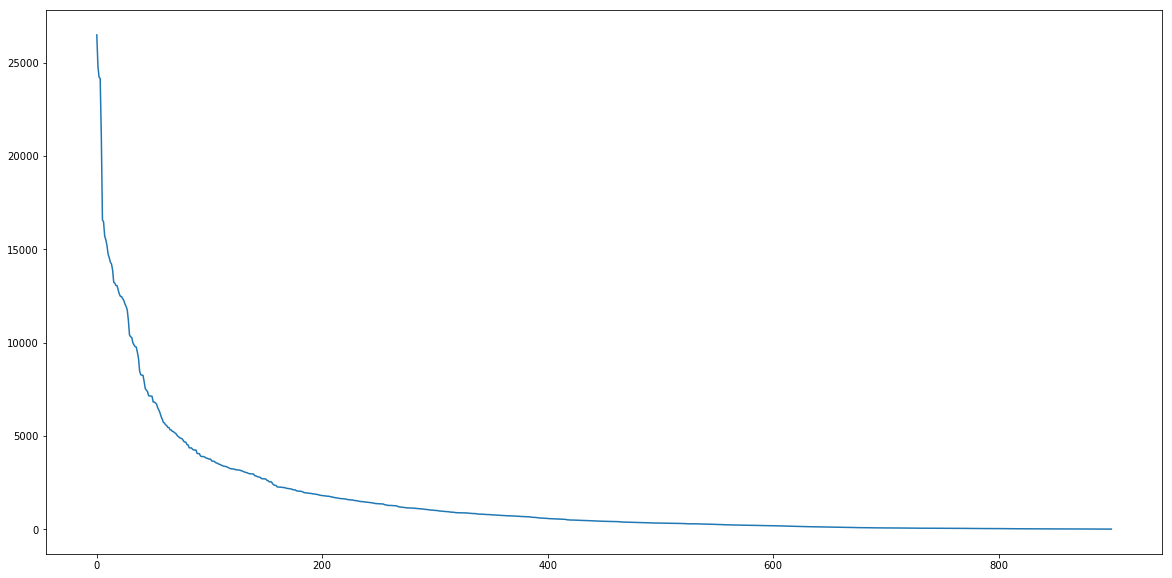

In [92]:
'''
Plot 
'''

from collections import Counter
author_counts = Counter(data_df['author']).values()

x = range(len(author_counts))
y = sorted(author_counts, reverse=True)

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

In [93]:
author_counts = Counter(data_df['author'])
sorted(author_counts, key=author_counts.get)
for w in sorted(author_counts, key=author_counts.get, reverse=True):
  print(w, author_counts[w])

maunaloona 26479
throwahoymatie 24794
of_ice_and_rock 24218
conspiracy_thug 24140
skekze 21072
jakkubus 16571
wardenclyffe56 16456
brackner 15706
intotheopen 15501
kekehippo 15213
gmoney8869 14742
roflocalypselol 14558
northernspectre 14310
catholic_extremist 14212
sub116610 13897
xereeto 13233
verinio 13176
in_liberty 13052
smookykins 13045
erowidtrance 12808
datastream 12596
thehighesteagle 12467
honorablejudgeholden 12461
cantseeshit 12349
tucos_cousin 12250
diarrhea_van_frank 12059
needhelpwithexcel 11934
olican101 11749
golden_dawn 11195
anal_vacuum 10407
trumptrumptrumptrump 10311
cattrump 10270
snakesovereagles 9990
ytumith 9869
botulox 9780
diversity_is_racism 9758
spirolateral 9477
mistermeatloaf 9151
faliceer 8467
gingerbeardy 8278
strid 8252
good-writer 8241
lordthat100188 7908
azzmo 7529
triquetra4715 7449
superdanceparty 7370
badgoywithagun 7151
tomroberts2016 7141
dailmail_bot 7133
o5-8 7120
soefianb 6815
aldehyde 6814
puffykilled2pac 6768
yesofcoursenaturally 6702
stinkf

# Check for missing dates

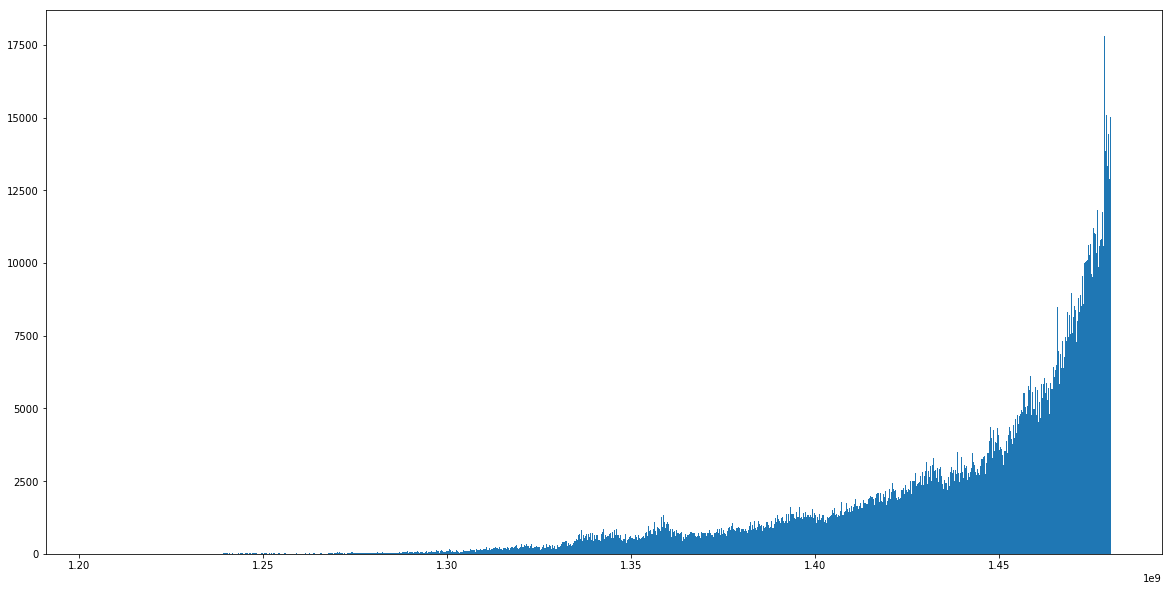

In [94]:
'''
Plot a histogram of every post by UTC. Any missing data will appear  
(1) A huge anomaly where a set of section data is clearly doubled compared to everything else
(2) A section of data is missing
(3) Both of the above
'''

plt.figure(figsize=(20,10))
plt.hist(data_df['created_utc'],bins = 1000)
plt.show()

# Determine each user's first post to r/altright

In [95]:
#Get a user's earliest post on r/altright and see if they posted 1 year prior to that.
earliest_posts_df = data_df[data_df['subreddit'] == 'altright']
earliest_posts_df = earliest_posts_df.groupby(['author'])['created_utc'].min().reset_index()
earliest_posts_df['1yr_thresh'] = earliest_posts_df['created_utc'].apply(lambda x:x - 31536000)
earliest_posts_df.head()

,author,created_utc,1yr_thresh
0,-reactionary_vizier-,1479133511,1447597511
1,-resputin-,1479052497,1447516497
2,-the_blazer-,1476997523,1445461523
3,-venator-,1470065349,1438529349
4,12_f_taiwan,1468198891,1436662891


In [96]:
data_df[data_df['author'] == '5000ninjas'].sort_values('created_utc')

,author,subreddit,body,created_utc,score
5291,5000ninjas,darksouls3,When does Ludleth scream or beg for mercy? Jus...,1465132643,6
1703,5000ninjas,darksouls3,"I'll be damned, he's right. Tested it myself a...",1465149973,7
415,5000ninjas,darksouls3,"I can see the marketing now. ""Be frustrated on...",1476975637,5
3237,5000ninjas,altright,"Total cuck here. Tennessee native, married to ...",1479430890,-3
10422,5000ninjas,altright,http://gq-images.condecdn.net/image/E8GdknR5L1...,1479514530,2
5444,5000ninjas,altright,"I believe your position is ""my life is unsatis...",1479516313,1
5759,5000ninjas,altright,Love that my comment got downvoted out of the ...,1479517057,1
2669,5000ninjas,darksouls3,"Read ""abyss watchers fart"" and got excited",1479557512,2
9396,5000ninjas,darksouls3,"That's cool that you write lore too, you'd thi...",1479560384,3
12670,5000ninjas,altright,Cool story bro,1479731409,0


In [252]:
# Filter by accounts > 1 year in usage
candidate = []
for i in range(len(earliest_posts_df)):
    author = earliest_posts_df.loc[i,'author']
    thresh = earliest_posts_df.loc[i,'1yr_thresh']
    candidate.append(sum(data_df[data_df['author'] == author]['created_utc'] < thresh))
earliest_posts_df['candidate'] = [1 if i > 0 else 0 for i in candidate]
earliest_posts_df = earliest_posts_df[earliest_posts_df['candidate'] == 1]
earliest_posts_df


100%|████████████████████████████████████████████████████████████████████████████████| 901/901 [02:12<00:00,  6.94it/s]


,author,created_utc,1yr_thresh,candidate
0,-reactionary_vizier-,1479133511,1447597511,1
2,-the_blazer-,1476997523,1445461523,1
3,-venator-,1470065349,1438529349,1
4,12_f_taiwan,1468198891,1436662891,1
13,3rdnipp1e,1476915384,1445379384,1
16,7yrlrkr,1469823459,1438287459,1
18,_hungry_ghost,1476556949,1445020949,1
20,_the_burn_,1474301085,1442765085,1
22,a_can_of_tea,1479174791,1447638791,1
23,a_mathematician,1475548637,1444012637,1


In [425]:
#Print list of filtered authors to file
file_df = earliest_posts_df['author'].reset_index()
del file_df['index']
file_df.to_csv('filtered_auths_altright.csv', encoding='utf-8')

In [426]:
#Print new filtered raw data to file 
file_df = data_df[data_df['author'].isin(file_df['author'])]
file_df.to_csv('filtered_posts_altright.csv', encoding='utf-8')

# Top Subreddits (Overall)

In [271]:
subreddit_counts = data_df.groupby(['subreddit','author']).count().reset_index()
candidates = [True if i in list(earliest_posts_df['author']) else False for i in subreddit_counts['author']]
subreddit_counts = subreddit_counts[candidates]
subreddit_counts = subreddit_counts.groupby(['subreddit'])['author'].count().reset_index()
subreddit_counts = subreddit_counts.sort_values('author', ascending=False)

,subreddit,author
5212,altright,383
451,AskReddit,309
4543,The_Donald,302
9772,worldnews,291
9348,todayilearned,263
8345,politics,258
7957,news,257
8282,pics,255
6729,funny,247
9600,videos,244


# Top Subreddits by Time from First Post

In [711]:
'''
Create a dataframe containing the start and end points of eight time intervals from a user's first post on r/altright
e.g.: Point in time @ -6mo, -12mo, etc. before first post
'''
subreddit_time_df = earliest_posts_df.copy()
del subreddit_time_df['1yr_thresh']
del subreddit_time_df['candidate']

for i in range(8):
    cur_month = str((i+1)*-6) + 'mo'
    if i == 0:
        subreddit_time_df[cur_month] = subreddit_time_df['created_utc'].apply(lambda x:int(x - 31536000/2))
    else:
        subreddit_time_df[cur_month] = subreddit_time_df[last_month].apply(lambda x:int(x - 31536000/2))
    last_month = cur_month

subreddit_time_df.head()

,author,created_utc,-6mo,-12mo,-18mo,-24mo,-30mo,-36mo,-42mo,-48mo
0,-reactionary_vizier-,1479133511,1463365511,1447597511,1431829511,1416061511,1400293511,1384525511,1368757511,1352989511
2,-the_blazer-,1476997523,1461229523,1445461523,1429693523,1413925523,1398157523,1382389523,1366621523,1350853523
3,-venator-,1470065349,1454297349,1438529349,1422761349,1406993349,1391225349,1375457349,1359689349,1343921349
4,12_f_taiwan,1468198891,1452430891,1436662891,1420894891,1405126891,1389358891,1373590891,1357822891,1342054891
13,3rdnipp1e,1476915384,1461147384,1445379384,1429611384,1413843384,1398075384,1382307384,1366539384,1350771384


In [744]:
'''
Create a dataframe that contains for each author, a list of subreddits they participated in time intervals from his first
r/altright post
'''

subreddit_time_df = subreddit_time_df.reset_index()
del subreddit_time_df['index']

top_subreddit_df = subreddit_time_df.copy()
del top_subreddit_df['created_utc']

for i,auth in tqdm(enumerate(top_subreddit_df['author'])):
    #Filter for Author
    auth_data = data_df[data_df['author'] == auth]

    #filter for Time Frame
    for j,col in enumerate(top_subreddit_df.columns):
        if j > 0: #skip author col
            cur_time = subreddit_time_df.loc[i,col]
            if j == 1: 
                last_time = subreddit_time_df.loc[i,'created_utc']
                sub_data = auth_data[(auth_data['created_utc'] < last_time) & #Need to not include the earliest r/altright post
                                      (auth_data['created_utc'] > cur_time)]
            else:
                sub_data = auth_data[(auth_data['created_utc'] <= last_time) & 
                                      (auth_data['created_utc'] > cur_time)]
            last_time = cur_time

            #Input List of Subreddits into Respective Cell
            top_subreddit_df.loc[i,col] = str(list(sub_data['subreddit'].unique()))

top_subreddit_df.head()

383it [01:03,  5.78it/s]


,author,-6mo,-12mo,-18mo,-24mo,-30mo,-36mo,-42mo,-48mo
0,-reactionary_vizier-,"['DotA2', 'CringeAnarchy', 'TrueDoTA2', 'Israe...","['learndota2', 'TrueDoTA2', 'aoe2', 'DotA2', '...","['learndota2', 'TrueDoTA2', 'DotA2', 'aoe2', '...",[],[],[],[],[]
1,-the_blazer-,"['technology', 'Planetside', 'space', 'worldne...","['Planetside', 'soma', 'space', 'pcmasterrace'...","['Planetside', 'pcmasterrace', 'Steam', 'space...","['Planetside', 'whatif', 'DotA2', 'pcmasterrac...","['pcmasterrace', 'Planetside', 'worldnews', 'H...","['pcmasterrace', 'IAmA', 'Planetside']",[],[]
2,-venator-,"['Shitstatistssay', 'pagan', 'Anarcho_Capitali...","['Metal', 'Anarcho_Capitalism', 'Conservative'...",['offmychest'],['offmychest'],[],[],[],[]
3,12_f_taiwan,"['TheRedPill', 'motorcycles', 'leagueoflegends...","['financialindependence', 'depression', 'TheRe...","['PFJerk', 'seduction', 'Frugal_Jerk', 'Frugal...","['Tekken', 'leagueoflegends', 'Frugal_Jerk', '...","['leagueoflegends', 'childfree', '4chan', 'And...","['hardbodies', 'leagueoflegends', '4chan', 'Sk...","['leagueoflegends', 'gaming', 'MURICA', '4chan...","['CircLoLjerk', 'leagueoflegends', 'firstworld..."
4,3rdnipp1e,"['The_Donald', 'RandomActsOfGaming', 'techsupp...","['GiftofGames', 'pcgaming', 'RandomActsOfGamin...","['shitpost', 'shittynosleep', 'DeepIntoYouTube...","['Afwcomics', 'youtubehaiku', 'battlefield_4',...",[],[],[],[]


In [748]:
'''
Combine all the subreddits in relative time intervals and count them
'''

import ast
import itertools

top_subreddits_mo = dict.fromkeys(top_subreddit_df.columns[1:],dict())

for time in top_subreddits_mo:
    month_subreddits = list(top_subreddit_df[time].apply(lambda x: ast.literal_eval(x)))
    month_subreddits = list(itertools.chain.from_iterable(month_subreddits))
    month_subreddits = Counter(month_subreddits)    
    top_subreddits_mo[time] = month_subreddits.most_common()

top_subreddits_mo


{'-12mo': [('AskReddit', 194),
  ('worldnews', 174),
  ('todayilearned', 150),
  ('news', 144),
  ('videos', 136),
  ('pics', 136),
  ('The_Donald', 133),
  ('politics', 129),
  ('funny', 126),
  ('movies', 108),
  ('gifs', 101),
  ('WTF', 93),
  ('IAmA', 93),
  ('european', 90),
  ('gaming', 88),
  ('AdviceAnimals', 84),
  ('explainlikeimfive', 79),
  ('Showerthoughts', 78),
  ('TumblrInAction', 78),
  ('SandersForPresident', 73),
  ('technology', 71),
  ('4chan', 68),
  ('atheism', 67),
  ('ImGoingToHellForThis', 67),
  ('nottheonion', 67),
  ('conspiracy', 67),
  ('television', 66),
  ('aww', 63),
  ('science', 61),
  ('KotakuInAction', 59),
  ('Jokes', 57),
  ('mildlyinteresting', 56),
  ('CringeAnarchy', 56),
  ('Music', 55),
  ('OldSchoolCool', 54),
  ('Conservative', 53),
  ('pcmasterrace', 52),
  ('TheRedPill', 52),
  ('Futurology', 52),
  ('dataisbeautiful', 51),
  ('BlackPeopleTwitter', 50),
  ('Documentaries', 48),
  ('europe', 46),
  ('Libertarian', 44),
  ('cringepics', 44

In [749]:
'''
Create a dataframe where the index is subreddits, and columns are the time inverals
Values = rank of top subreddit usage (by posting in it) among our candidates each subreddit
'''
ranking_df = pd.DataFrame(np.empty((10,len(top_subreddit_df.columns[1:]))),columns=top_subreddit_df.columns[1:])
ranking_df.index = [i for (i,j) in top_subreddits_mo['-6mo']][0:10]

for time in ranking_df.columns: 
    for rank,(subreddit,count) in enumerate(top_subreddits_mo[time][0:10]):
        ranking_df.loc[subreddit,time] = rank + 1
        
#Seperate Loop to Force NANs in (weird issues with pandas)
for time_col in ranking_df.columns: 
    ranking_df[time_col] = ranking_df[time_col].apply(lambda x: None if x < 1 else x)

ranking_df

,-6mo,-12mo,-18mo,-24mo,-30mo,-36mo,-42mo,-48mo
The_Donald,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
AskReddit,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
worldnews,3.0,2.0,2.0,2.0,2.0,4.0,6.0,6.0
politics,4.0,8.0,NaN,NaN,NaN,NaN,10.0,NaN
news,5.0,4.0,5.0,7.0,9.0,NaN,NaN,NaN
todayilearned,6.0,3.0,3.0,6.0,3.0,3.0,3.0,5.0
pics,7.0,6.0,4.0,4.0,5.0,5.0,5.0,2.0
videos,8.0,5.0,7.0,5.0,6.0,7.0,NaN,10.0
funny,9.0,9.0,6.0,3.0,4.0,2.0,2.0,3.0
movies,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [841]:
#Need altered labels to make the y axis more comprehensible
y_labels = ['[-6mo:0mo]', '[-12mo:-6mo]', '[-18mo:-12mo]', '[-24mo:-18mo]',  '[-30mo:-24mo]', '[-36mo:-30mo]', '[-42mo:-36mo]', '[-48mo:-42mo]']

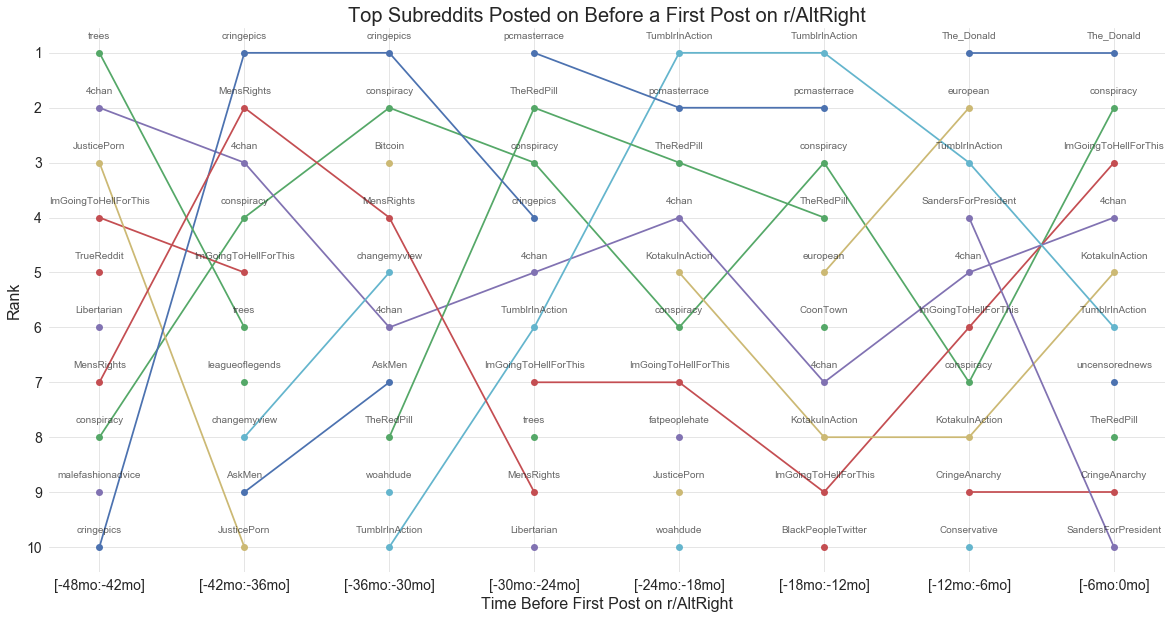

In [842]:
#Plot with default subreddits
x = range(len(ranking_df.columns))

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_facecolor('white')

ax.set_prop_cycle(None)
for subreddit in ranking_df.index:
    plt.plot(x,ranking_df.loc[subreddit,:],'o')
    for i,j in zip(x,ranking_df.loc[subreddit,:]):
        ax.annotate(subreddit,xy=(i,j-.3),size=10, va='center', ha='center',alpha=.7, )

ax.set_prop_cycle(None)
for subreddit in ranking_df.index:
    plt.plot(x,ranking_df.loc[subreddit,:])


plt.xticks(x,y_labels, size=14)
plt.yticks(range(1,11), size=14)
plt.grid(c='black',alpha=.1)
plt.title('Top Subreddits Posted on Before a First Post on r/AltRight', size=20)
plt.xlabel('Time Before First Post on r/AltRight', size=16)
plt.ylabel('Rank', size=16)

plt.savefig('altright_topsubs_defaults.png', orientation = 'landscape', dpi = 600)

plt.show()

##### What happens when there are no default subreddits?

In [808]:
#List of any sub that has ever been a 'default' sub (That I could find?)
default_subs = ['AdviceAnimals','announcements','Art','AskReddit','askscience',
                'Atheism','aww','BestOf','blog','books','creepy','dataisbeautiful','DIY',
                'Documentaries','EarthPorn','explainlikeimfive','Fitness','food','funny',
                'Futurology','gadgets','gaming','GetMotivated','gifs','history','IAmA',
                'InternetIsBeautiful','Jokes','LifeProTips','listentothis','mildlyinteresting',
                'movies','Music','news','nosleep','nottheonion','OldSchoolCool','personalfinance',
                'philosophy','photoshopbattles','pics','Politics','programming','reddit.com',
                'science','Showerthoughts','space','sports','Technology','television','tifu',
                'todayilearned','TwoXChromosomes','UpliftingNews','videos','worldnews','WritingPrompts','WTF']
default_subs = [i.lower() for i in default_subs]
default_subs[0:10]

['adviceanimals',
 'announcements',
 'art',
 'askreddit',
 'askscience',
 'atheism',
 'aww',
 'bestof',
 'blog',
 'books']

In [827]:
'''
Create a dataframe where the index is subreddits, and columns are the time inverals
Values = rank of top subreddit usage (by posting in it) among our candidates each subreddit
'''
ranking_df = pd.DataFrame(np.empty((10,len(top_subreddit_df.columns[1:]))),columns=top_subreddit_df.columns[1:])
ranking_df.index = [i for (i,j) in top_subreddits_mo['-6mo'] if i.lower() not in default_subs][0:10]

for time in ranking_df.columns: 
    no_default_list = [i for (i,j) in top_subreddits_mo[time] if i.lower() not in default_subs][0:10]
    for rank,subreddit in enumerate(no_default_list):
        ranking_df.loc[subreddit,time] = rank + 1
        if time == '-18mo':
            print((rank,subreddit))

#Seperate Loop to Force NANs in (weird issues with pandas)
for time_col in ranking_df.columns: 
    ranking_df[time_col] = ranking_df[time_col].apply(lambda x: None if x < 1 else x)

ranking_df

(0, 'TumblrInAction')
(1, 'pcmasterrace')
(2, 'conspiracy')
(3, 'TheRedPill')
(4, 'european')
(5, 'CoonTown')
(6, '4chan')
(7, 'KotakuInAction')
(8, 'ImGoingToHellForThis')
(9, 'BlackPeopleTwitter')


,-6mo,-12mo,-18mo,-24mo,-30mo,-36mo,-42mo,-48mo
The_Donald,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
conspiracy,2.0,7.0,3.0,6.0,3.0,2.0,4.0,8.0
ImGoingToHellForThis,3.0,6.0,9.0,7.0,7.0,NaN,5.0,4.0
4chan,4.0,5.0,7.0,4.0,5.0,6.0,3.0,2.0
KotakuInAction,5.0,8.0,8.0,5.0,NaN,NaN,NaN,NaN
TumblrInAction,6.0,3.0,1.0,1.0,6.0,10.0,NaN,NaN
uncensorednews,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TheRedPill,8.0,NaN,4.0,3.0,2.0,8.0,NaN,NaN
CringeAnarchy,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
SandersForPresident,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


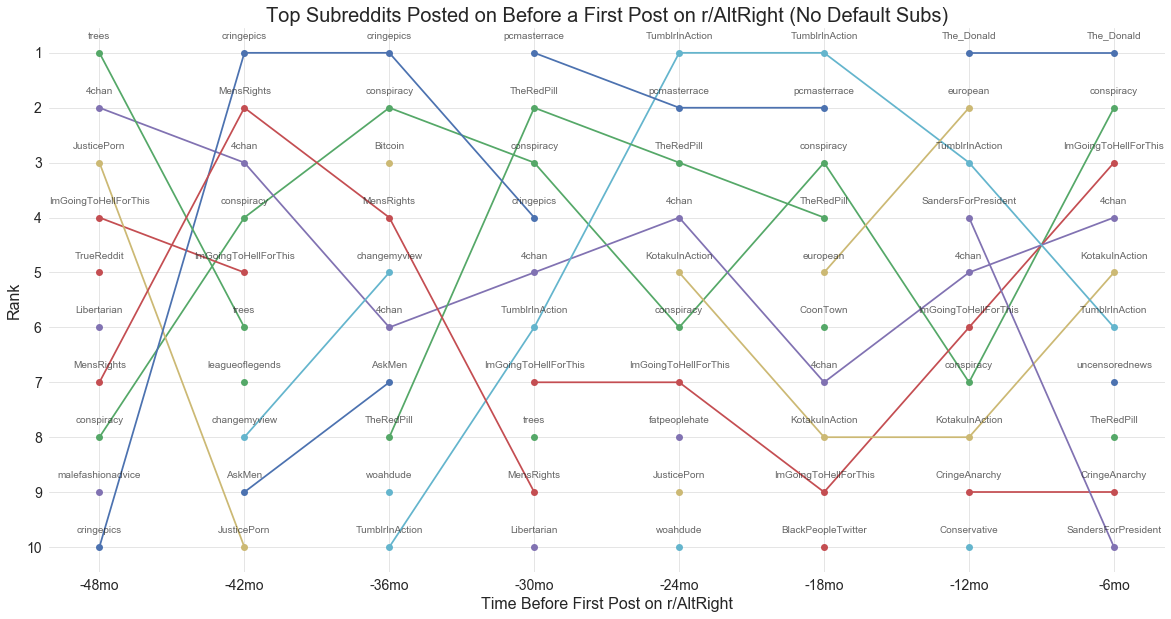

In [843]:
#Plot with default subreddits
x = range(len(ranking_df.columns))

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_facecolor('white')

ax.set_prop_cycle(None)
for subreddit in ranking_df.index:
    plt.plot(x,ranking_df.loc[subreddit,:],'o')
    for i,j in zip(x,ranking_df.loc[subreddit,:]):
        ax.annotate(subreddit,xy=(i,j-.3),size=10, va='center', ha='center',alpha=.7, )

ax.set_prop_cycle(None)
for subreddit in ranking_df.index:
    plt.plot(x,ranking_df.loc[subreddit,:])


plt.xticks(x,ranking_df.columns, size=14)
plt.yticks(range(1,11), size=14)
plt.grid(c='black',alpha=.1)
plt.title('Top Subreddits Posted on Before a First Post on r/AltRight (No Default Subs)', size=20)
plt.xlabel('Time Before First Post on r/AltRight', size=16)
plt.ylabel('Rank', size=16)

plt.savefig('altright_topsubs_nodefaults.png', orientation = 'landscape', dpi = 600)
plt.show()